# Car Pirce Prediction (PPP - RK's definition - Product Price Prediction)
#### Finding the features and descirbing, which will predict the car price siginificantly

##Business problem
Client wants to predict the price of a car based on the given features

##Converting it into data science problem
We have to describe all the features which is very siginificantly close to predict the car price, and we shall suggest to the client these are the features are very close to fix the price of car for their upcoming new models

In [107]:
#Necessary libraries for data cleaning are imported here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Load
#### 1. As a first lets load the data have a look it and describe

In [108]:
df = pd.read_csv ('cars_price.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


# Variable Name Correction

#### We can see the variable names are having "-" which is not recommended in  any programming to have in variable/column names, hence lets remove or replace it with "_", which will be helpful to read the variable names in future

In [109]:
df = df.rename(columns=lambda x: x.replace('-','_'))
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

Cool, now the variable names are looks good, now lets have a details about the data

Variable description based on our assumption

---


Symboling : its a rating system for insurance companies to determine the risk associated with insuring a particular car. The higher the symboling number, the riskier the car is to insure.

Normalized_losses : relative average loss payment per insured vehicle year. It is a continuous variable that ranges from 65 to 256.

Make : make of the car, such as Honda, Toyota, etc.

Fuel_type : fuel type of the car, such as gas or diesel.

Aspiration : This variable represents whether the car is naturally aspirated or turbocharged.

Num_of_doors : number of doors on the car.

Body_style : body style of the car, such as sedan, coupe, etc.

Drive_wheels : type of drive train, such as front-wheel drive, rear-wheel drive, or all-wheel drive.

Engine_location : location of the engine, such as front or rear.

Wheel_base : distance between the centers of the front and rear wheels.

Length : length of the car.

Width : width of the car.

Height : height of the car.

Curb_weight : weight of the car without any passengers or cargo.

Engine_type : type of engine, such as OHV, OHC, etc.

Num_of_cylinders : number of cylinders in the engine.

Engine_size : size of the engine in cubic centimeters.

Fuel_system : type of fuel system, such as carburetor or fuel injection.

Bore : diameter of the cylinders in the engine.

Stroke : length of the pistons in the engine.

Compression_ratio : ratio of the volume of the cylinder and combustion chamber when the piston is at the bottom of its stroke compared to when it is at the top of its stroke.

Horsepower : power output of the engine.

Peak_rpm : engine speed at which the horsepower is at its peak.

City_mpg : miles per gallon (mpg) the car gets in city driving.

Highway_mpg : miles per gallon (mpg) the car gets on the highway.

Price : price of the car.


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [111]:
df.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [112]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [113]:
df.tail()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


#Understanding about the data
##### 1) We can see there are many variables has numeric data, but the variable types are not in the numeric, we have to do the restructuring
##### 2) there are character we can see "?", which will be represent to as a missing value, but when we have "?" it is a string, so we have to remove it and lets make the necessary variables to be in numeric as numeric only

##### hold on, we have missed to see the shape of data, its also necessary to understand how many records are there in the data, hence after cleaning we see the comparision on loss of data between the actual and cleaned data
Note: here we have defined the data as df

In [114]:
df.shape

(205, 26)

Now lets begin our baby step in the data cleaning, as of now we have understood only the variable types are not appropriate as per the data, we shall do this,  then we can see about the central measures, range, outliers and all.., as to see this the data sturcture should be in the proper way

Before we start cleaning, lets have a backup data, hence it will be helpfull to roll back if any issues.

In [115]:
backup=df

In [116]:
df.replace('?',np.NaN , inplace=True)

In [117]:
df.normalized_losses.unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [118]:
df['normalized_losses']=df.normalized_losses.astype('Int64')


In [119]:
df.normalized_losses.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized_losses, dtype: float64

successfully we have done the variable conversion by retaining the missing values, shall we do the same for all the required variables.

In [120]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,<NA>,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,<NA>,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,<NA>,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [121]:
# df.info()
# for col in df.columns:
#     sample = df[col].iloc[:5]
#     for val in sample:
#       print(type(val))


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    Int64  
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

Checking whether any unwanted characters are there by looking at their unique values, also we can see the type of variable too, both will be fixed now

In [123]:
df.fuel_type.unique() #this is ok

array(['gas', 'diesel'], dtype=object)

In [124]:
df_no_duplicates = pd.DataFrame()
for col in df.columns:
    # df_no_duplicates[col] = df[col].drop_duplicates()
    print(f"{col}\t:::{df[col].unique()}\n")
# print('Original dataframe:')
# print(df)

# print('\nDataframe with no duplicates:')
# df_no_duplicates


symboling	:::[ 3  1  2  0 -1 -2]

normalized_losses	:::<IntegerArray>
[<NA>,  164,  158,  192,  188,  121,   98,   81,  118,  148,  110,  145,  137,
  101,   78,  106,   85,  107,  104,  113,  150,  129,  115,   93,  142,  161,
  153,  125,  128,  122,  103,  168,  108,  194,  231,  119,  154,   74,  186,
   83,  102,   89,   87,   77,   91,  134,   65,  197,   90,   94,  256,   95]
Length: 52, dtype: Int64

make	:::['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

fuel_type	:::['gas' 'diesel']

aspiration	:::['std' 'turbo']

num_of_doors	:::['two' 'four' nan]

body_style	:::['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drive_wheels	:::['rwd' 'fwd' '4wd']

engine_location	:::['front' 'rear']

wheel_base	:::[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  1

Variable bore, stroke and horsepower are float data, fixing the variable type as float 

The peark_rpm & price is interger data, hence fixing it as int64

In [125]:
df['bore']=df['bore'].astype('float')
df['stroke']=df['stroke'].astype('float')
df['horsepower']=df['horsepower'].astype('float')

In [126]:
df['peak_rpm']=df['peak_rpm'].astype('Int64')
df['price']=df['price'].astype('Int64')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    Int64  
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

# Data cleaning

In [128]:
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [129]:
#Will see whehter the make variable has the names are without typo errors
sorted(df['make'].unique())

['alfa-romero',
 'audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercedes-benz',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

The make column is neat and clean

#Handling - Missing Values
##With 2 Strategies. 
### 1) Removing data (records) / cols
### 2) imputing with the required strategy

In [130]:
sum(df.normalized_losses.isnull())*100/df.shape[0]

20.0

Since we have 20% of the data is null of this normalized_losses, lets drop it

In [131]:
df = df.drop(['normalized_losses'], axis=1)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel_type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num_of_doors       203 non-null    object 
 5   body_style         205 non-null    object 
 6   drive_wheels       205 non-null    object 
 7   engine_location    205 non-null    object 
 8   wheel_base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb_weight        205 non-null    int64  
 13  engine_type        205 non-null    object 
 14  num_of_cylinders   205 non-null    object 
 15  engine_size        205 non-null    int64  
 16  fuel_system        205 non

There are some missing values in the num_of_doors based on the self awareness, the num_of_doors, mostly related to the body_style, 
lets have a look whether the data also says the same and fix it.

In [133]:
pd.crosstab(df['num_of_doors'],df['body_style'])

body_style,convertible,hardtop,hatchback,sedan,wagon
num_of_doors,,,,,
four,0,0,10,79,25
two,6,8,60,15,0


Mostly the data is fine, lets have a look in detail since we have the data, of make of the car, lets have a look with that too..

In [134]:
df[df['num_of_doors'].isna()]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,...,98,mpfi,3.03,3.39,7.6,102.0,5500,24,30,8558
63,0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,...,122,idi,3.39,3.39,22.7,64.0,4650,36,42,10795


In [135]:
df[(df['make'] == 'dodge') & (df['body_style'] == 'sedan') ]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
25,1,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,...,90,2bbl,2.97,3.23,9.4,68.0,5500,31,38,6692
26,1,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,...,90,2bbl,2.97,3.23,9.4,68.0,5500,31,38,7609
27,1,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,...,98,mpfi,3.03,3.39,7.6,102.0,5500,24,30,8558


we can understand that the dodge has four doors for those body_style is sedan, lets replace the Nan with four based on this condition

In [136]:
df.loc[(df['num_of_doors'].isna()) & (df['make'] == 'dodge') & (df['body_style'] == 'sedan'),'num_of_doors'] = 'four'
df[(df['make'] == 'dodge') & (df['body_style'] == 'sedan') ]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
25,1,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,...,90,2bbl,2.97,3.23,9.4,68.0,5500,31,38,6692
26,1,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,...,90,2bbl,2.97,3.23,9.4,68.0,5500,31,38,7609
27,1,dodge,gas,turbo,four,sedan,fwd,front,93.7,157.3,...,98,mpfi,3.03,3.39,7.6,102.0,5500,24,30,8558


In [137]:
df[(df['make'] == 'mazda') & (df['body_style'] == 'sedan') ]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
53,1,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,...,91,2bbl,3.03,3.15,9.0,68.0,5000,31,38,6695
54,1,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,...,91,2bbl,3.08,3.15,9.0,68.0,5000,31,38,7395
60,0,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800,26,32,8495
62,0,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800,26,32,10245
63,0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,...,122,idi,3.39,3.39,22.7,64.0,4650,36,42,10795
65,0,mazda,gas,std,four,sedan,rwd,front,104.9,175.0,...,140,mpfi,3.76,3.16,8.0,120.0,5000,19,27,18280
66,0,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,...,134,idi,3.43,3.64,22.0,72.0,4200,31,39,18344


Same here, the mazda sedan has four doors, lets replace the same

In [138]:
df.loc[(df['num_of_doors'].isna()) & (df['make'] == 'mazda') & (df['body_style'] == 'sedan'),'num_of_doors'] = 'four'
df[(df['make'] == 'mazda') & (df['body_style'] == 'sedan') ]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
53,1,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,...,91,2bbl,3.03,3.15,9.0,68.0,5000,31,38,6695
54,1,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,...,91,2bbl,3.08,3.15,9.0,68.0,5000,31,38,7395
60,0,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800,26,32,8495
62,0,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800,26,32,10245
63,0,mazda,diesel,std,four,sedan,fwd,front,98.8,177.8,...,122,idi,3.39,3.39,22.7,64.0,4650,36,42,10795
65,0,mazda,gas,std,four,sedan,rwd,front,104.9,175.0,...,140,mpfi,3.76,3.16,8.0,120.0,5000,19,27,18280
66,0,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,...,134,idi,3.43,3.64,22.0,72.0,4200,31,39,18344


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel_type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num_of_doors       205 non-null    object 
 5   body_style         205 non-null    object 
 6   drive_wheels       205 non-null    object 
 7   engine_location    205 non-null    object 
 8   wheel_base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb_weight        205 non-null    int64  
 13  engine_type        205 non-null    object 
 14  num_of_cylinders   205 non-null    object 
 15  engine_size        205 non-null    int64  
 16  fuel_system        205 non

***There are missing value in the price column which can't be as its a target column, lets try find any related values are there.***

---



In [140]:
df[df['price'].isna()]
df[(df['price'].isna()) & (df['fuel_system']=='mpfi')]
df[ (df['fuel_system']=='mpfi') &  (df['make']=='audi')]
df[df['price'].isna()]

df[ (df['fuel_system']=='2bbl') &  (df['make']=='isuzu')]
df[(df['make']=='mazda')]
print(df.make.value_counts())
df.loc[(df['price'].isna())]


toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64


,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160.0,5500,16,22,<NA>
44,1,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70.0,5400,38,43,<NA>
45,0,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70.0,5400,38,43,<NA>
129,1,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,...,203,mpfi,3.94,3.11,10.0,288.0,5750,17,28,<NA>


At first look, its difficult to fill the price, even if we try to fix it with mean/ any other value which may lead to wrong direction,  ideally we delete those records lets do it "removing the data for those price value is missing".

In [141]:
df=df.dropna(subset=['price'])

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   make               201 non-null    object 
 2   fuel_type          201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num_of_doors       201 non-null    object 
 5   body_style         201 non-null    object 
 6   drive_wheels       201 non-null    object 
 7   engine_location    201 non-null    object 
 8   wheel_base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb_weight        201 non-null    int64  
 13  engine_type        201 non-null    object 
 14  num_of_cylinders   201 non-null    object 
 15  engine_size        201 non-null    int64  
 16  fuel_system        201 non

In [143]:
df_desc=df.describe()
iqr = df_desc.loc['75%'] - df_desc.loc['25%']
df_desc.loc['IQR'] = iqr
df_desc
lb = df_desc.loc['25%'] - (1.5 * df_desc.loc['IQR'])
ub = df_desc.loc['75%'] + (1.5* df_desc.loc['IQR'])
df_desc.loc['LB'] = lb
df_desc.loc['UB'] = ub
# o_lb = (((df_desc.loc['min'] / df_desc.loc['LB']) / df_desc.loc['LB'])*100)
# o_ub = (((df_desc.loc['max'] - df_desc.loc['UB']) / df_desc.loc['UB'])*100)
df_desc.loc['O_LB'] = df_desc.loc['min']<lb 
df_desc.loc['O_UB'] = df_desc.loc['max']>ub

df_desc # here we can see lots of outliers in the data, will see its reasonable or how.


,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000
IQR,2.000000,7.900000,16.700000,2.500000,3.500000,757.000000,43.000000,0.440000,0.300000,0.800000,46.000000,700.000000,11.000000,9.000000,8725.000000
LB,-3.000000,82.650000,141.750000,60.350000,46.750000,1033.500000,33.500000,2.490000,2.660000,7.400000,1.000000,3750.000000,2.500000,11.500000,-5312.500000


The bore has no outliers hence we can fill it with mean
but the stroke looks have an outlier, but the range is too low and when we see at the subjective level,
which is not required to handle, also the mean and median is not far, hence filling the na with mean only

In [144]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<function matplotlib.pyplot.show(close=None, block=None)>

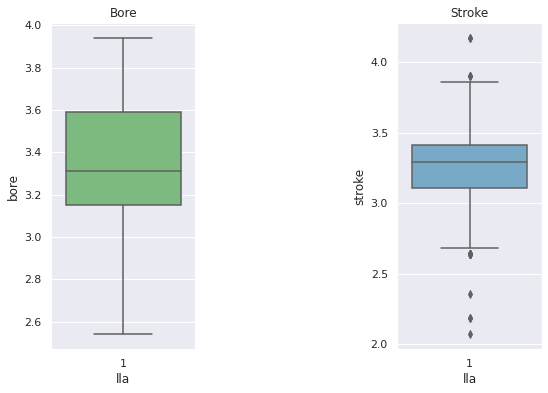

In [145]:
plt.figure(figsize = (15,6))
# plt.style.use('dark_background')
plt.subplot(1,5,1)
df['lla']=1
plt.title('Bore')
sns.set(style="darkgrid")
sns.boxplot(data=df, x='lla',y='bore',palette="Greens")

plt.subplot(1,5,3)
plt.title('Stroke')
sns.boxplot(data=df, x='lla',y='stroke',palette="Blues")


# plt.subplot(1,2,2)
# plt.title('Stroke')
# df.boxplot(column=['stroke'])
plt.show

In [146]:
df['bore']=df['bore'].fillna(df['bore'].mean())
df['stroke']=df['stroke'].fillna(df['stroke'].mean())

In [147]:
df.horsepower.describe() # looks there are some outliers lets have a look at in the box plot

count    199.000000
mean     103.396985
std       37.553843
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: horsepower, dtype: float64

<Axes: >

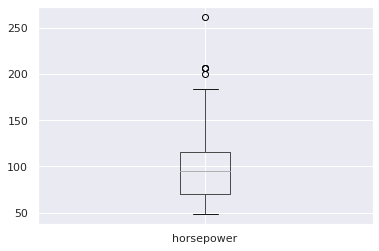

In [148]:
df.boxplot(column=['horsepower'])

In [149]:
Q1 = df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

46.0


/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


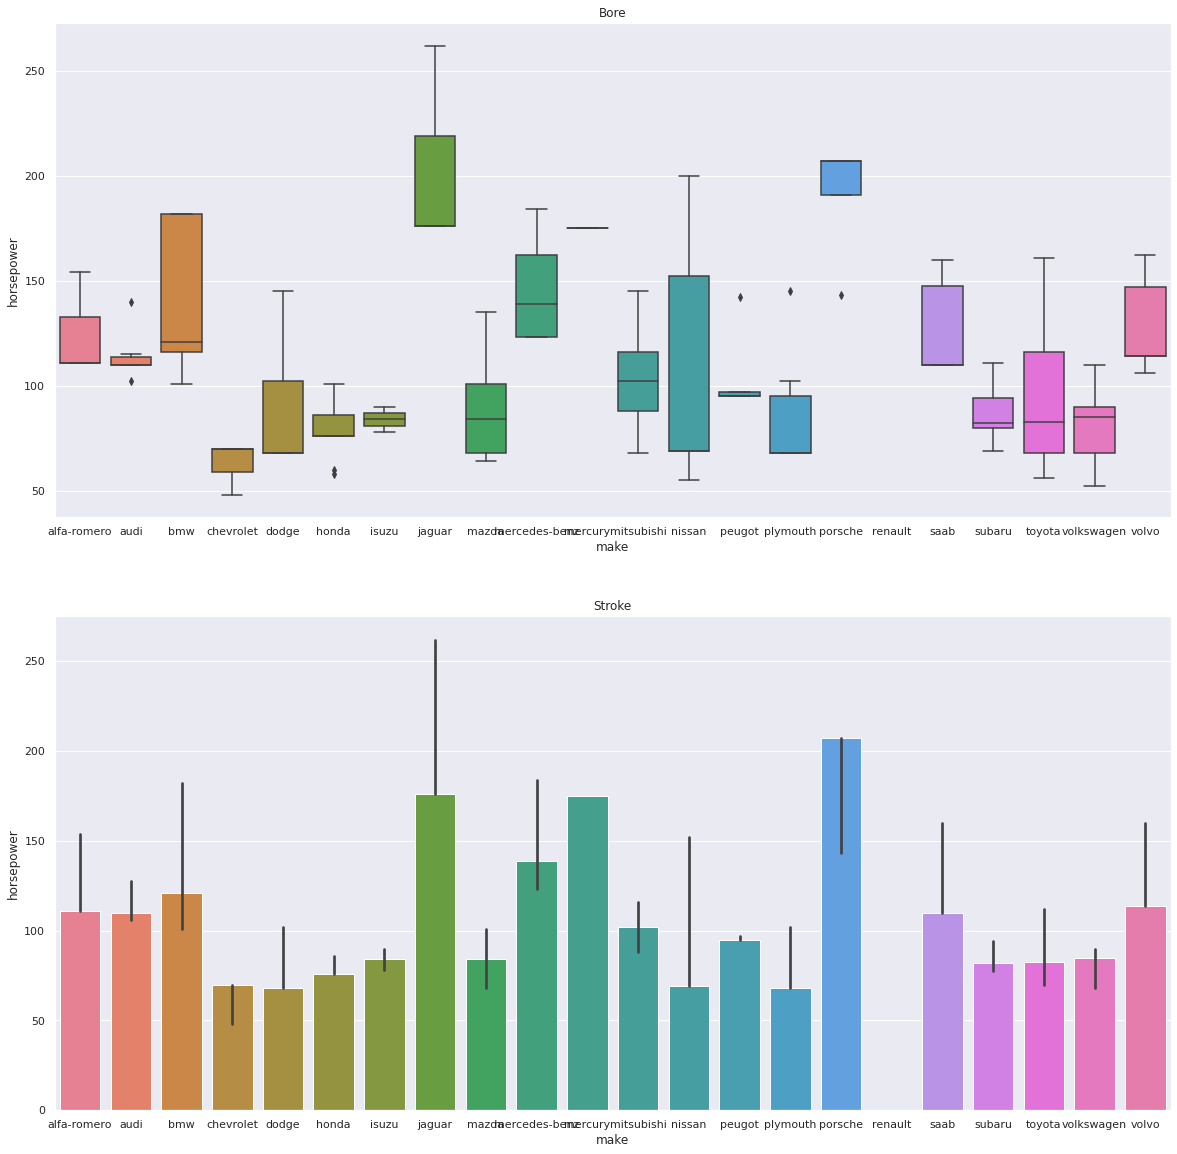

In [150]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.boxplot(data=df, x='make',y='horsepower',palette="husl",ax=axs[0])
axs[0].set_title('Bore')
sns.barplot(data=df, x='make',y='horsepower',palette="husl",estimator = np.median)
axs[1].set_title('Stroke')
plt.show()

The jaguar, porsche , and mercury, all these brands are having high value also it shows the outlier too.. but still it make sense, the horsepower it depends to brand

In [151]:
df.horsepower.mode()


0    68.0
Name: horsepower, dtype: float64

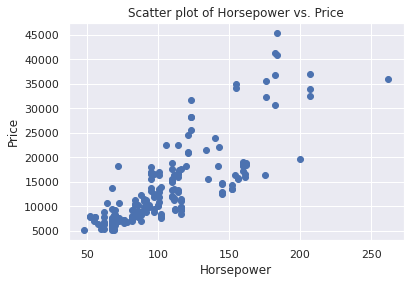

In [152]:
plt.scatter(df['horsepower'], df['price'])

plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter plot of Horsepower vs. Price')
plt.show()


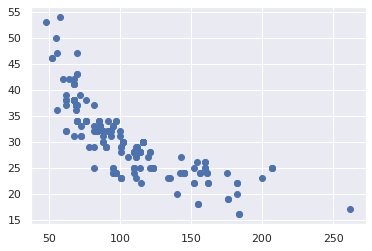

In [153]:
plt.scatter(df['horsepower'], df['highway_mpg'])
#it clearly shows the highway_mpg and horespower has linear relationship, hence lets fill the missing values in horespower, based on the highway_mpg

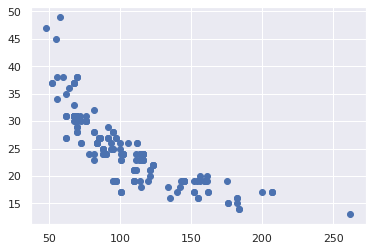

In [154]:
plt.scatter(df['horsepower'], df['city_mpg'])


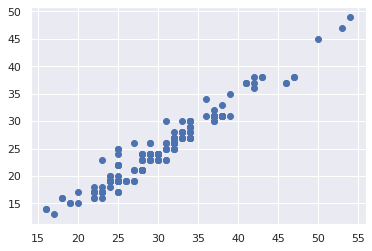

In [155]:
plt.scatter(df['highway_mpg'], df['city_mpg']) 
#looks both are good to go, to fill the na of horsepower

<Axes: >

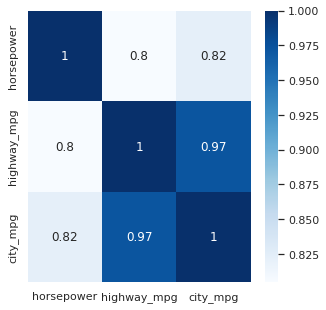

In [156]:

corrmat=df[['horsepower','highway_mpg','city_mpg']].corr()
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat.abs(), annot=True, cmap='Blues', ax=ax)

It clearly shows the horsepower is linearly related to the price, mileage.. lets fill out instead of mean value, will fill the missing value on horsepower, by training the data with linear

In [157]:
from sklearn.linear_model import LinearRegression
new_df = df[['horsepower', 'highway_mpg', 'city_mpg']]

# splitting the data into two sets: one with missing 'horsepower' values and one without
missing = new_df[new_df['horsepower'].isna()]
not_missing = new_df.dropna(subset=['horsepower'])

# training a linear regression model on the data without missing values
lr = LinearRegression()
lr.fit(not_missing[['highway_mpg', 'city_mpg']], not_missing['horsepower'])

# predicting the missing values using the trained model
missing['horsepower'] = lr.predict(missing[['highway_mpg', 'city_mpg']])

# # combine the data back into a single DataFrame
df.update(missing)
     

<ipython-input-157-ebbf09cb7927>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing['horsepower'] = lr.predict(missing[['highway_mpg', 'city_mpg']])


<Axes: >

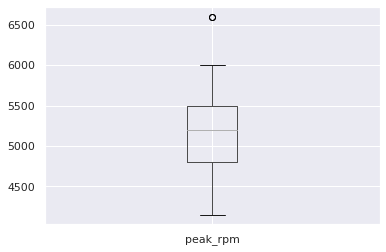

In [158]:
df.boxplot(column=['peak_rpm'])

In [159]:
df.peak_rpm.describe()

count     199.000000
mean     5117.587940
std       480.521824
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak_rpm, dtype: float64

data looks good, we can fill the missing value with mean value itself.

In [160]:
df['peak_rpm'] = df['peak_rpm'].astype(float)
mean_val = df['peak_rpm'].mean()
df['peak_rpm'].fillna(mean_val, inplace=True)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   make               201 non-null    object 
 2   fuel_type          201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num_of_doors       201 non-null    object 
 5   body_style         201 non-null    object 
 6   drive_wheels       201 non-null    object 
 7   engine_location    201 non-null    object 
 8   wheel_base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb_weight        201 non-null    int64  
 13  engine_type        201 non-null    object 
 14  num_of_cylinders   201 non-null    object 
 15  engine_size        201 non-null    int64  
 16  fuel_system        201 non

<Axes: >

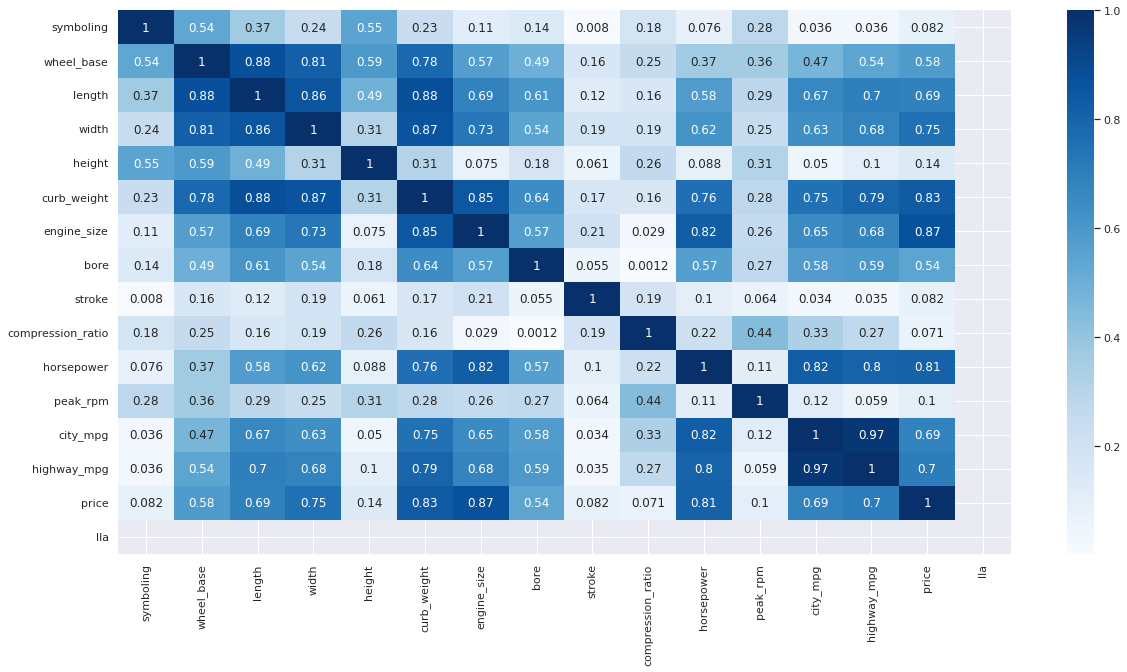

In [162]:
corrmat=df.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat.abs(), annot=True, cmap='Blues', ax=ax)

In [163]:
mx_corrmat=corrmat.copy()

In [164]:
mx_corrmat.replace(1,0,inplace=True)

In [165]:
mx_corrmat.max().sort_values()

stroke               0.205806
symboling            0.279719
peak_rpm             0.279719
compression_ratio    0.331425
height               0.590742
bore                 0.644041
horsepower           0.822702
width                0.866201
engine_size          0.872335
price                0.872335
wheel_base           0.876024
length               0.880665
curb_weight          0.880665
city_mpg             0.972044
highway_mpg          0.972044
lla                       NaN
dtype: float64

Almost all the variables are correlated with any one of the other variables, there are few, which has some descent correlation. 

In [166]:
df_desc=df.describe()
iqr = df_desc.loc['75%'] - df_desc.loc['25%']
df_desc.loc['IQR'] = iqr
df_desc
lb = df_desc.loc['25%'] - (1.5 * df_desc.loc['IQR'])
ub = df_desc.loc['75%'] + (1.5* df_desc.loc['IQR'])
df_desc.loc['LB'] = lb
df_desc.loc['UB'] = ub
# o_lb = (((df_desc.loc['min'] / df_desc.loc['LB']) / df_desc.loc['LB'])*100)
# o_ub = (((df_desc.loc['max'] - df_desc.loc['UB']) / df_desc.loc['UB'])*100)
df_desc.loc['O_LB'] = df_desc.loc['min']<lb 
df_desc.loc['O_UB'] = df_desc.loc['max']>ub

df_desc # here we can see lots of outliers in the data, will see its reasonable or how.


,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,lla
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.0
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.490344,5117.587940,25.179104,30.686567,13207.129353,1.0
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.377263,478.113178,6.423220,6.815150,7947.066342,0.0
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,1.0
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,1.0
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000,1.0
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,1.0
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.0
IQR,2.000000,7.900000,16.700000,2.500000,3.500000,757.000000,43.000000,0.430000,0.300000,0.800000,46.000000,700.000000,11.000000,9.000000,8725.000000,0.0
LB,-3.000000,82.650000,141.750000,60.350000,46.750000,1033.500000,33.500000,2.505000,2.660000,7.400000,1.000000,3750.000000,2.500000,11.500000,-5312.500000,1.0


There are some outliers, and it looks ok by browsing the data. Will see the results the will apply, some outlier if required.
--------- Cleaning activities are over

# EDA 
#### Lets Do some Exploration on the data - (Exploratory Data Analysis) by using some visuals

In [167]:
df

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,lla
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495,1
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500,1
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500,1
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950,1
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845,1
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045,1
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485,1
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470,1


By the way while fixing the missing values for horsepower, we better can have one more variable as overall mileage, and naming it as "mpg__", it calculated by applying weights, i.e. highway_mpg 0.45 for city_mpg 0.55.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


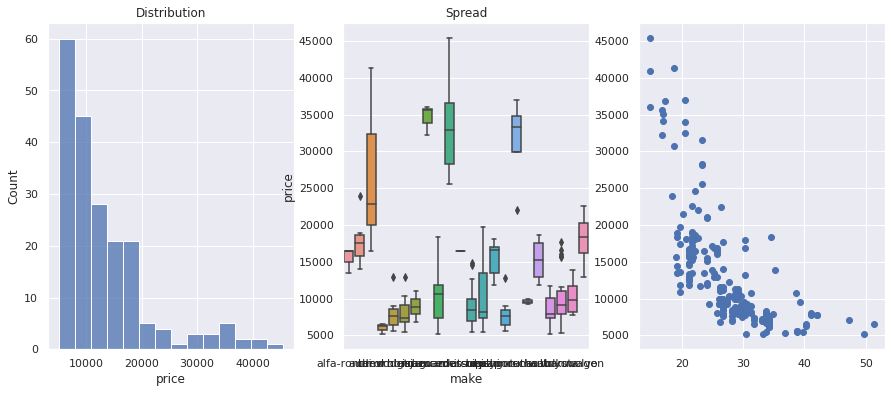

In [168]:
df['mpg__'] = (df['highway_mpg'] * .45) + (df['city_mpg']*.55)
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.title('Distribution')
sns.histplot(df.price)
# sns.histplot(data=df, x="horsepower", kde=True)

plt.subplot(1,3,2)
plt.title('Spread')
sns.boxplot(data=df,x='make',y=df.price)

plt.subplot(1,3,3)
df_price = df[df['price'].notna()]
plt.scatter(df_price['mpg__'], df_price['price'])

plt.show()

In [169]:
print(df.price.dtype,df.horsepower.dtype)

Int64 float64


Understanding :
1. The price is right - skewed.
 The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
2. data points are skewed, hence checking the percentiles in different levels, from 0 to 100% where i can see there are 10% of the data has the range between 22500 to 45000, the rest all the cars are priced under 22500.
3. since the data is skewed, i feel better to apply random forrests or decision trees, lets dig some more then will take a call

In [170]:
df.price.describe(percentiles = [0.10,0.25,0.40,0.50,0.60,0.75,0.80,0.85,0.90,1])

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
10%       6649.000000
25%       7775.000000
40%       9095.000000
50%      10295.000000
60%      12440.000000
75%      16500.000000
80%      17199.000000
85%      18420.000000
90%      22470.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

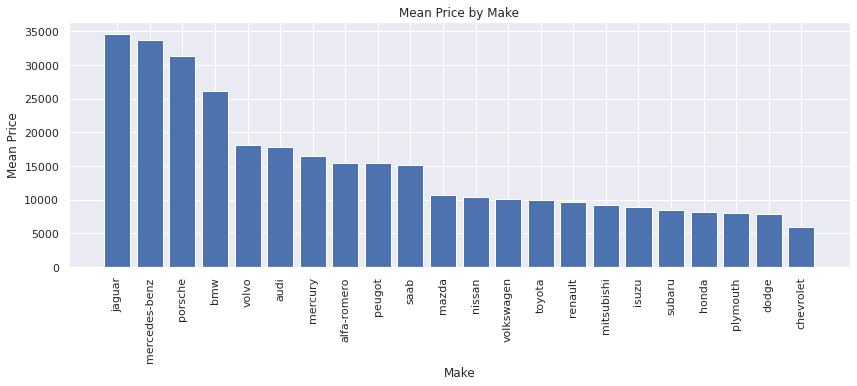

In [171]:
make_price = df.groupby('make')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(14,4.5))
plt.bar(make_price.index, make_price.values)
plt.xticks(rotation=90)
plt.title('Mean Price by Make')
plt.xlabel('Make')
plt.ylabel('Mean Price')
plt.show()

In [172]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
# string_cols = df.select_dtypes(include=['object']).columns.tolist()

# for col in numeric_cols:
#     plt.figure()
#     sns.scatterplot(data=df, x=col, y='price')
#     plt.title(f"{col} vs. Price")

# for col in string_cols:
#     plt.figure()
#     sns.barplot(data=df, x=col, y='price')
#     plt.title(f"{col} vs. Price")


In [173]:
# for column in df.columns:
#     plt.figure(figsize=(8, 6))
#     plt.title(f"{column} vs. average price")
#     if df[column].dtype == "object":
#         sns.barplot(x=column, y="price", data=df)
#     else:
#         sns.scatterplot(x=column, y="price", data=df)
#     plt.xlabel(column)
#     plt.ylabel("Average price")
#     plt.show()


Am going to use Correlation method to apply to know the relationship with the price, to find out the best columns

In [174]:
# df.describe()

In [175]:
# plt.figure(figsize=(20,8))

# plt.subplot(1,2,1)
# plt.title('Symboling Histogram')
# sns.countplot(df.symboling, palette=("cubehelix"))

# plt.subplot(1,2,2)
# plt.title('Symboling vs Price')
# sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

# plt.show()

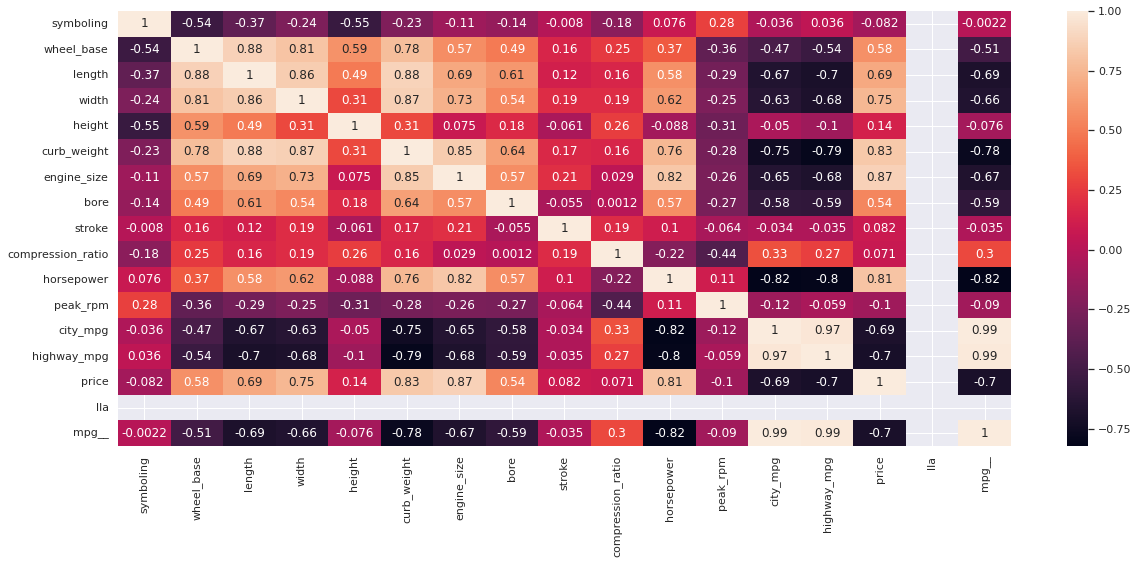

In [176]:
plt.figure(figsize=(20,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [177]:
df_no_duplicates = pd.DataFrame()
for col in df.columns:
    # df_no_duplicates[col] = df[col].drop_duplicates()
    print(f"{col}\t:::{df[col].unique()}\n")

symboling	:::[ 3  1  2  0 -1 -2]

make	:::['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

fuel_type	:::['gas' 'diesel']

aspiration	:::['std' 'turbo']

num_of_doors	:::['two' 'four']

body_style	:::['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drive_wheels	:::['rwd' 'fwd' '4wd']

engine_location	:::['front' 'rear']

wheel_base	:::[ 88.6  94.5  99.8  99.4 105.8 101.2 103.5 110.   88.4  93.7 103.3  95.9
  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7 115.6
  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2 107.9
 114.2 108.   89.5  96.1  99.1  93.3  97.   96.9  95.7  98.4 102.4 102.9
 104.5  97.3 104.3 109.1]

length	:::[168.8 171.2 176.6 177.3 192.7 176.8 189.  193.8 197.  141.1 155.9 158.8
 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7 172.6
 199.6 191.7

In [178]:
# xdf=df.copy()

#enCoding the data

In [179]:
# df=xdf
df['num_of_doors'] = df['num_of_doors'].map({'two': 2, 'four': 4})
df['num_of_cylinders'] = df['num_of_cylinders'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

df['make'] = df['make'].astype('category').cat.codes
df['fuel_type'] = df['fuel_type'].astype('category').cat.codes
df['aspiration'] = df['aspiration'].astype('category').cat.codes
df['body_style'] = df['body_style'].astype('category').cat.codes
df['drive_wheels'] = df['drive_wheels'].astype('category').cat.codes
df['engine_location'] = df['engine_location'].astype('category').cat.codes
df['engine_type'] = df['engine_type'].astype('category').cat.codes
df['fuel_system'] = df['fuel_system'].astype('category').cat.codes


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   make               201 non-null    int8   
 2   fuel_type          201 non-null    int8   
 3   aspiration         201 non-null    int8   
 4   num_of_doors       201 non-null    int64  
 5   body_style         201 non-null    int8   
 6   drive_wheels       201 non-null    int8   
 7   engine_location    201 non-null    int8   
 8   wheel_base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb_weight        201 non-null    int64  
 13  engine_type        201 non-null    int8   
 14  num_of_cylinders   201 non-null    int64  
 15  engine_size        201 non-null    int64  
 16  fuel_system        201 non

In [181]:
df.to_csv('reg_data.csv', index=False)

In [182]:
df['temp'] = df['price'].astype('float')
for col in df.select_dtypes(include=np.number).columns:
  df['tempx']=df[col].astype('float')
  print(f"{col}: {df['tempx'].corr(df['temp'])}")


symboling: -0.0823911871696236
make: -0.1636463329630027
fuel_type: -0.11032556467564833
aspiration: 0.17957848135197432
num_of_doors: 0.04243534269811207
body_style: -0.07293257127569965
drive_wheels: 0.5883330641805211
engine_location: 0.3310618670099157
wheel_base: 0.5846418222655086
length: 0.6906283804483648
width: 0.7512653440522669
height: 0.13548630756805982
curb_weight: 0.8344145257702834
engine_type: 0.12602453769256064
num_of_cylinders: 0.7086453694468247
engine_size: 0.8723351674455198
fuel_system: 0.5216890829532035
bore: 0.5431537659807731
stroke: 0.0822670999221236
compression_ratio: 0.07110732668194136
horsepower: 0.8082876277391532
peak_rpm: -0.10154203145050211
city_mpg: -0.686571006784468
highway_mpg: -0.704692265058953
price: 1.0
lla: nan
mpg__: -0.6998760683666387
temp: 1.0


#Feature selection

# Data Split for Train and Test

In [183]:
rdf=df.copy()

In [184]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   make               201 non-null    int8   
 2   fuel_type          201 non-null    int8   
 3   aspiration         201 non-null    int8   
 4   num_of_doors       201 non-null    int64  
 5   body_style         201 non-null    int8   
 6   drive_wheels       201 non-null    int8   
 7   engine_location    201 non-null    int8   
 8   wheel_base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb_weight        201 non-null    int64  
 13  engine_type        201 non-null    int8   
 14  num_of_cylinders   201 non-null    int64  
 15  engine_size        201 non-null    int64  
 16  fuel_system        201 non

In [186]:
drop_col = ['price','lla','temp','symboling','make','tempx']
X=rdf.drop(drop_col,axis=1)
y=rdf['price']

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [188]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

In [189]:
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

#Machine Learning

In [190]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [202]:
models = [
    ('LR', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('DT', DecisionTreeRegressor()),
    ('RF', RandomForestRegressor()),
    ('XGBRegressor', XGBRegressor()),
    ('GBR', GradientBoostingRegressor())
]


In [203]:

results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append([r2, mse])
    names.append(name)
    print(name, "R-squared:", r2, "MSE:", mse)

# Comparing the models
results_df = pd.DataFrame(results, columns=['R-squared', 'MSE'], index=names)
results_df.sort_values(by='R-squared', ascending=False, inplace=True)
print(results_df)


LR R-squared: 0.8173325374997912 MSE: 13840766.94667738
Ridge R-squared: 0.8342229164153809 MSE: 12560978.006643882
Lasso R-squared: 0.8182592887675137 MSE: 13770546.73264188
ElasticNet R-squared: 0.8231992019575904 MSE: 13396248.06847452
DT R-squared: 0.8843850167456225 MSE: 8760181.024390243
RF R-squared: 0.9398938425976852 MSE: 4554261.0888613835
XGBRegressor R-squared: 0.9115023690428692 MSE: 6705491.326400338
GBR R-squared: 0.9334732536235282 MSE: 5040750.989336193
              R-squared           MSE
RF             0.939894  4.554261e+06
GBR            0.933473  5.040751e+06
XGBRegressor   0.911502  6.705491e+06
DT             0.884385  8.760181e+06
Ridge          0.834223  1.256098e+07
ElasticNet     0.823199  1.339625e+07
Lasso          0.818259  1.377055e+07
LR             0.817333  1.384077e+07


# Evaluating the model

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fuel_type          201 non-null    int8   
 1   aspiration         201 non-null    int8   
 2   num_of_doors       201 non-null    int64  
 3   body_style         201 non-null    int8   
 4   drive_wheels       201 non-null    int8   
 5   engine_location    201 non-null    int8   
 6   wheel_base         201 non-null    float64
 7   length             201 non-null    float64
 8   width              201 non-null    float64
 9   height             201 non-null    float64
 10  curb_weight        201 non-null    int64  
 11  engine_type        201 non-null    int8   
 12  num_of_cylinders   201 non-null    int64  
 13  engine_size        201 non-null    int64  
 14  fuel_system        201 non-null    int8   
 15  bore               201 non-null    float64
 16  stroke             201 non

#in the above output we can see the **random forrest** is provides 
#*best score 0.927888 and low MSE 4.02*
#lets apply it in grid search and select the best model

# the best model comes out as RandomForestRegressor but we did with xgb

In [193]:
lin_model = XGBRegressor(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

[16:23:26] WARNING: ../src/learner.cc:767: 
Parameters: { "fit_intercept" } are not used.

 Accuracy of the model is 91.15


In [194]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np

for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))


Learning rate :  0.01  Train score :  0.35615300566369956  Cross-Val score :  0.01675101641904071
Learning rate :  0.02  Train score :  0.8724768406893768  Cross-Val score :  0.7379002922879552
Learning rate :  0.03  Train score :  0.9698133993537847  Cross-Val score :  0.8431955358704373
Learning rate :  0.04  Train score :  0.9902610084688992  Cross-Val score :  0.8600709603061233
Learning rate :  0.05  Train score :  0.9956297924305773  Cross-Val score :  0.8683381241796464
Learning rate :  0.06  Train score :  0.9968671278309247  Cross-Val score :  0.8665089781757883
Learning rate :  0.07  Train score :  0.9980564468184296  Cross-Val score :  0.868239728607511
Learning rate :  0.08  Train score :  0.9983409490003136  Cross-Val score :  0.8674685400200179
Learning rate :  0.09  Train score :  0.9985059227649744  Cross-Val score :  0.8721463022398457
Learning rate :  0.1  Train score :  0.9986515788306404  Cross-Val score :  0.8758069996420476
Learning rate :  0.11  Train score :  0.

In [195]:
model = xgb.XGBRegressor(learning_rate = 0.09, n_estimators=100)
model.fit(X_train,y_train) #train the model
model.score(X_test, y_test) # scoring the model - r2 squared

0.941495333089382

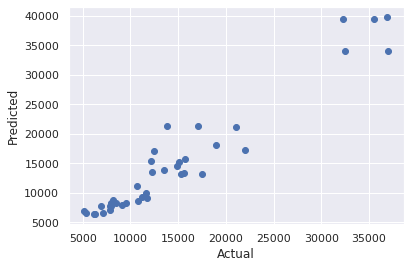

In [196]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


In [197]:
pred_df=pd.DataFrame({'y_test':y_test,'y_pred':y_pred,'Difference':y_test-y_pred})
pred_df

,y_test,y_pred,Difference
19,6295,6407.590332,-112.590332
174,10698,11220.159180,-522.15918
110,13860,21256.576172,-7396.576172
101,13499,13924.896484,-425.896484
181,15750,15781.360352,-31.360352
186,8495,8239.884766,255.115234
5,15250,13181.179688,2068.820312
150,5348,6504.429688,-1156.429688
13,21105,21211.523438,-106.523438
156,6938,7809.186035,-871.186035


In [ ]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 19 to 138
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   y_test      41 non-null     Int64  
 1   y_pred      41 non-null     float64
 2   Difference  41 non-null     Float64
dtypes: Float64(1), Int64(1), float64(1)
memory usage: 1.4 KB


In [198]:
pred_df['y_pred']=pred_df.y_pred.astype('float')
pred_df['y_test']=pred_df.y_test.astype('float')

<Axes: xlabel='y_test', ylabel='y_pred'>

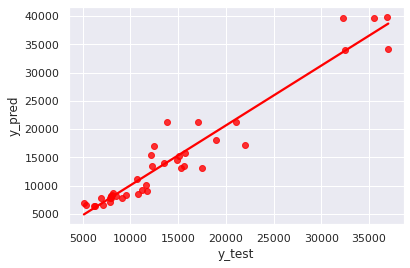

In [199]:
sns.regplot(data=pred_df, x='y_test', y='y_pred', ci=None, color='red')

#random forrest 

In [208]:
df.shape

(201, 29)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)
# original_train_features, original_test_features, original_train_labels, original_test_labels = train_test_split(original_features, original_labels, test_size = 0.25, random_state = 42)
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
res=pd.DataFrame(columns=['Iterator','Score'])
results=[]
# Instantiate model 
for i in range(1,100):
  rf = RandomForestRegressor(n_estimators= i, max_depth = 5, max_features='sqrt')

  # Train the model on training data
  rf.fit(X_train, y_train);

  # Use the forest's predict method on the test data
  predictions = rf.predict(X_test)
  rf_res=r2_score(predictions, y_test)
  results.append([i, rf_res])

  # print(f"estimation [{i}]: {rf_res}")

result_rf = pd.DataFrame(results,columns=['estimator','Score'])
result_rf.sort_values(by='Score',ascending=False,inplace=True)
result_rf

,Iterator,Score
43,44,0.941438
41,42,0.939965
14,15,0.936430
64,65,0.934604
28,29,0.931639
...,...,...
16,17,0.844731
2,3,0.829362
12,13,0.787308
7,8,0.759889


In [276]:
import math
rf = RandomForestRegressor(n_estimators= 150, max_depth = 5, max_features='sqrt',min_samples_leaf=2) #max_depth=int(math.log(df.shape[0]-1)/math.log(2))
rf.fit(X_train, y_train);
predictions = rf.predict(X_test)
r2_score(predictions, y_test)

0.887164286933464